# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
df=pd.merge(mouse_metadata,study_results, on ="Mouse ID")

# Display the data table for preview
df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [10]:
# Checking the number of mice.
df["Mouse ID"].nunique()

249

In [69]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

# Find duplicate rows based on Mouse ID and Timepoint
duplicate_mice = df[df.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]

# Get the duplicate mice by ID number
duplicate_mice_ids = duplicate_mice['Mouse ID'].unique()

# Print the duplicate mice IDs
duplicate_mice_ids



array(['g989'], dtype=object)

In [16]:
# Optional: Get all the data for the duplicate mouse ID. 
# Filter the DataFrame for duplicate mouse IDs
duplicate_data = df[df['Mouse ID'].isin(duplicate_mice_ids)]

# Sort the data frame by Mouse ID and Timepoint
duplicate_data = duplicate_data.sort_values(by=['Mouse ID', 'Timepoint'])

# Imprimir los duplicados ordenados
duplicate_data



,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [116]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = df.loc[df['Mouse ID']!="g989"]




clean_df



,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [117]:
# Checking the number of mice in the clean DataFrame.
num_clean_df=clean_df["Mouse ID"].nunique()

print(num_clean_df)

248


## Summary Statistics

In [118]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

# Calculate summary statistics for tumor volume
summary_stats = df.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])

# Create a summary DataFrame
summary_df = pd.DataFrame(summary_stats)

summary_df = summary_df.rename(columns={'mean': 'Mean Tumor Volume',
                                        'median': 'Median Tumor Volume',
                                        'var': 'Tumor Volume Variance',
                                        'std': 'Tumor Volume Std. Dev.',
                                        'sem': 'Tumor Volume Std. Err.'})

# Print the summary DataFrame
summary_df



,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [33]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line


## Bar and Pie Charts

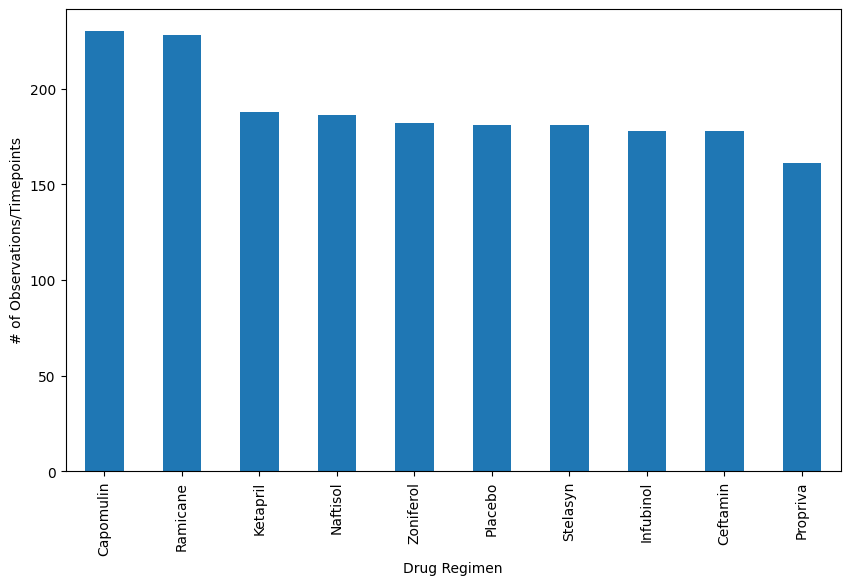

In [119]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
data_count = df['Drug Regimen'].value_counts()

# Generate the bar plot
data_count.plot(kind='bar', figsize=(10, 6))

# Set the labels and title
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observations/Timepoints')

# Show the plot
plt.show()



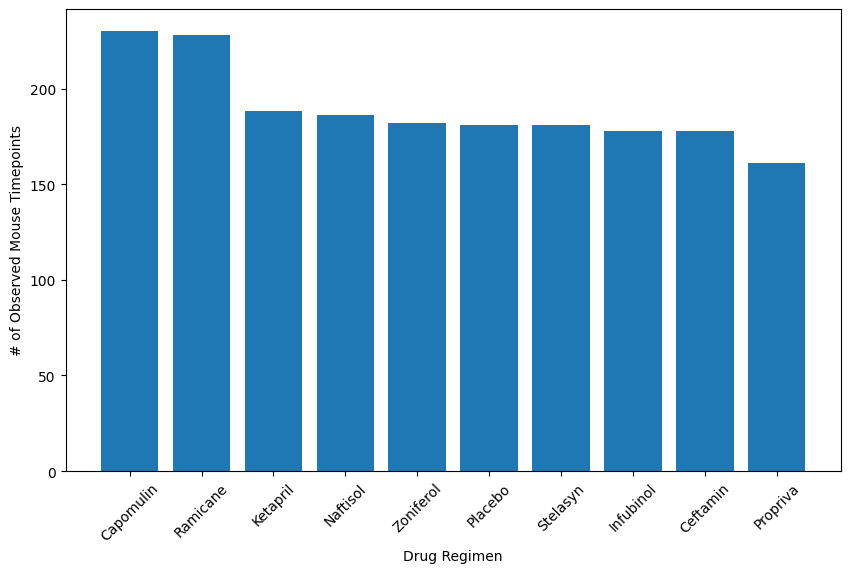

In [120]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

# Count the number of rows for each drug regimen
data_count = df['Drug Regimen'].value_counts()

# Create the bar plot
plt.figure(figsize=(10, 6))
plt.bar(data_count.index, data_count.values)

# Set the labels and title
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')

# Rotate the x-axis labels if needed
plt.xticks(rotation=45)

# Show the plot
plt.show()


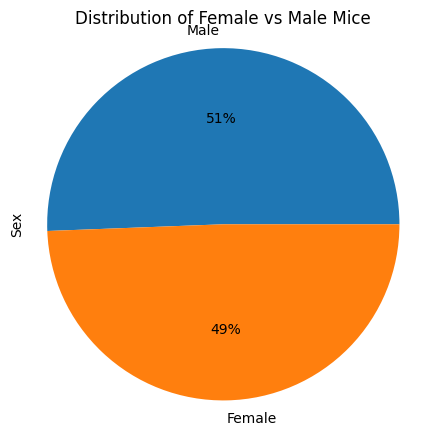

In [130]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

# Count the number of female and male mice
gender_counts = df['Sex'].value_counts()

# Generate the pie plot
gender_counts.plot(kind='pie', autopct='%1.f%%', figsize=(5, 5))

# Set the title
plt.title('Distribution of Female vs Male Mice')
plt.ylabel("Sex")

# Set the aspect ratio to equal for a circular pie
plt.axis('equal')

# Show the plot
plt.show()



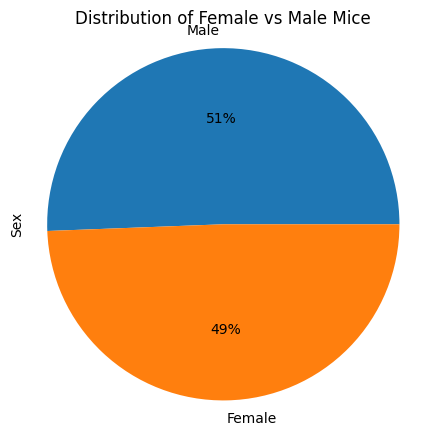

In [129]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
# Count the number of female and male mice
gender_counts = df['Sex'].value_counts()

# Generate the pie plot
plt.figure(figsize=(5, 5))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.f%%')

# Set the title
plt.title('Distribution of Female vs Male Mice')
plt.ylabel('Sex')

# Set the aspect ratio to equal for a circular pie
plt.axis('equal')

# Show the plot
plt.show()



## Quartiles, Outliers and Boxplots

In [123]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse

last_timepoints = df.groupby('Mouse ID')['Timepoint'].max().reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_tumor_volume = pd.merge(last_timepoints, df, on=['Mouse ID', 'Timepoint'])



treatment_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
final_tumor_volume = final_tumor_volume[final_tumor_volume['Drug Regimen'].isin(treatment_regimens)]
final_tumor_volume.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
3,a275,45,Ceftamin,Female,20,28,62.999356,3
6,a411,45,Ramicane,Male,3,22,38.407618,1
7,a444,45,Ramicane,Female,10,25,43.047543,0


In [62]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']


# Create empty list to fill with tumor vol data (for plotting)

tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for treatment in treatments:
 
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_volumes = final_tumor_volume.loc[final_tumor_volume['Drug Regimen'] == treatment, 'Tumor Volume (mm3)']
    tumor_vol_data.append(tumor_volumes)
    
    
    
    # add subset 
    
    subset_condition = tumor_volumes > 40  
    subset_data = tumor_volumes.loc[subset_condition]
    
    
    # Determine outliers using upper and lower bounds
    
    quartiles = tumor_volumes.quantile([0.25, 0.5, 0.75])
    lower_quartile, upper_quartile = quartiles[0.25], quartiles[0.75]
    iqr = upper_quartile - lower_quartile
    
     # Determine the lower and upper bounds for potential outliers
    lower_bound, upper_bound = lower_quartile - (1.5 * iqr), upper_quartile + (1.5 * iqr)
    
    outliers = tumor_volumes.loc[(tumor_volumes < lower_bound) | (tumor_volumes > upper_bound)]
    print(f"{treatment}'s potential outliers: {outliers}")
  

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


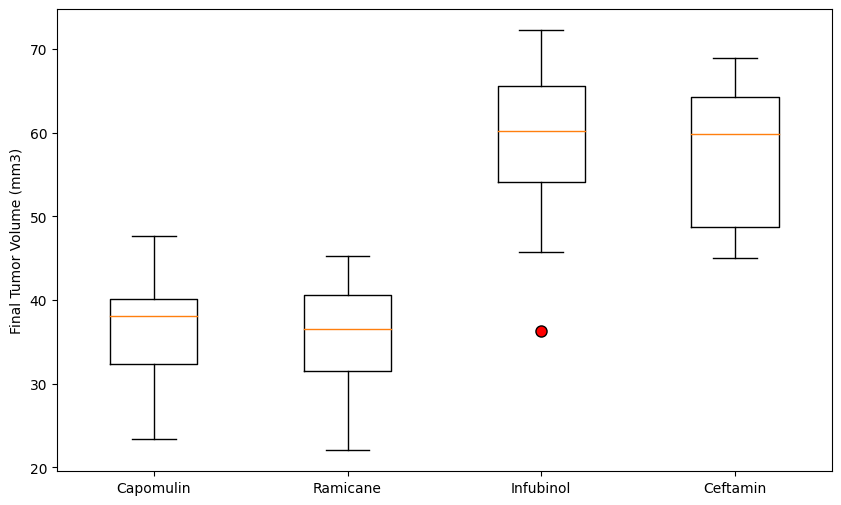

In [124]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.

# Create the box plot
plt.figure(figsize=(10, 6))
box_plot = plt.boxplot(tumor_vol_data, labels=treatments, flierprops={'marker': 'o', 'markerfacecolor': 'red', 'markersize': 8})


# Add labels and title
plt.ylabel('Final Tumor Volume (mm3)')

# Show the plot
plt.show()


## Line and Scatter Plots

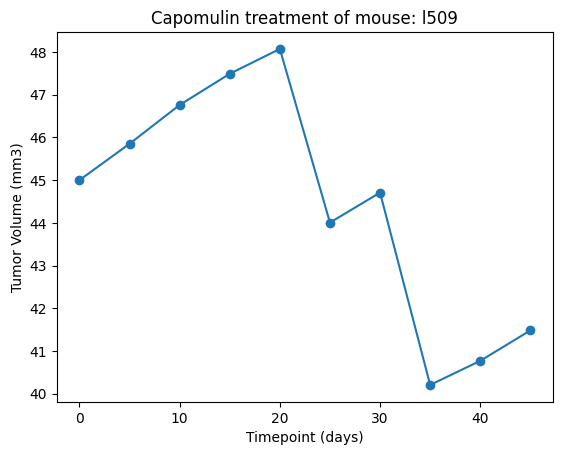

In [125]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

# Choose a specific mouse ID
mouse_id = 'l509'

# Filter the data for the selected mouse treated with Capomulin
mouse_data = df.loc[(df["Drug Regimen"] == "Capomulin") & (df["Mouse ID"] == mouse_id)]

# Create the line plot
plt.plot(mouse_data["Timepoint"], mouse_data["Tumor Volume (mm3)"], marker="o")

# Add labels and title
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title(f"{mouse_data['Drug Regimen'].iloc[0]} treatment of mouse: {mouse_id}")


# Show the plot
plt.show()



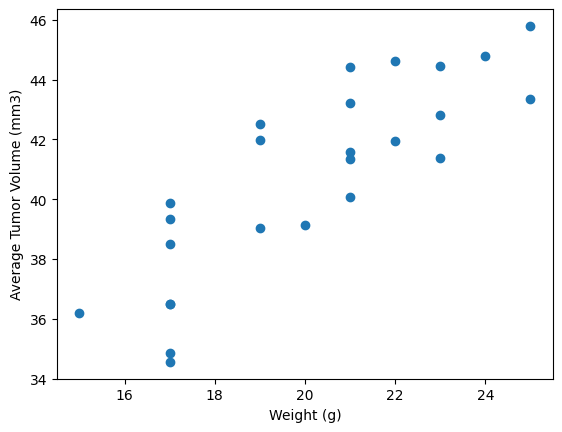

In [126]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
# Filter the data for the Capomulin regimen
capomulin_data = df[df['Drug Regimen'] == 'Capomulin']

# Group the data by Mouse ID and calculate the average tumor volume
avg_tumor_volume = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()

# Retrieve the weight and average tumor volume data for the mice
weight = capomulin_data.groupby('Mouse ID')['Weight (g)'].unique().apply(lambda x: x[0])
average_volume = avg_tumor_volume.values

# Create the scatter plot
plt.scatter(weight, average_volume)

# Add labels and title
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')


# Show the plot
plt.show()


## Correlation and Regression

The correlation between mouse weigth and the average tumor colume is 0.84


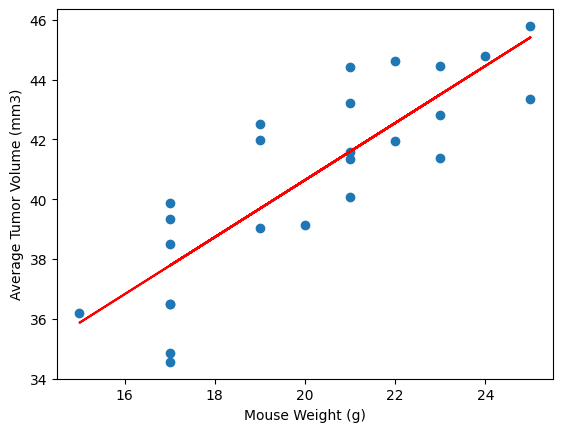

In [127]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

from scipy.stats import pearsonr, linregress

# Calculate the correlation coefficient
correlation_coef, _ = pearsonr(weight, average_volume)
print(f"The correlation between mouse weigth and the average tumor colume is {correlation_coef:.2f}")


plt.scatter(weight, average_volume)

# Plot the linear regression line
regression_line = slope * weight + intercept
plt.plot(weight, regression_line, color='red')

# Add labels and title
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")


# Show the plot
plt.show()
